In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('../data/Womens Clothing E-Commerce Reviews.csv')

In [12]:
print("Shape:" , df.shape, "\n")
print("Preview: \n" ,df.head(), "\n")
print("Dataframe info \n", df.info(), "\n")
print("Dataframe stats: \n",df.describe(), "\n")

Shape: (23486, 11) 

Preview: 
    Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates      

In [13]:
print("Null elements: \n",df.isnull().sum(), "\n")
print("Duplicates: \n",df.duplicated().sum())

Null elements: 
 Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64 

Duplicates: 
 0


In [14]:
print("Dataframe columns: ", df.columns)

Dataframe columns:  Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [15]:
df['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
23481    23481
23482    23482
23483    23483
23484    23484
23485    23485
Name: Unnamed: 0, Length: 23486, dtype: int64

In [16]:
# We don't need an 'Unnamed: 0' column which is an index
df.drop(columns=['Unnamed: 0'],inplace=True)

In [17]:
# for future commodity, I'd like to convert the names of the columns to pythonic case   :

def make_pythonic_column_names(df):
    """
    Convert all column names in the DataFrame to a Pythonic format.
    """
    new_column_names = []

    for column_name in df.columns:
        # Convert spaces to underscores and make lowercase
        pythonic_name = column_name.lower().replace(' ', '_')
        new_column_names.append(pythonic_name)

    df.columns = new_column_names
    return df

In [18]:
df = make_pythonic_column_names(df)
print(df.columns)

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')


In [19]:
print("Null elements: \n",df.isnull().sum(), "\n")
print("Duplicates: \n",df.duplicated().sum())

Null elements: 
 clothing_id                   0
age                           0
title                      3810
review_text                 845
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                14
department_name              14
class_name                   14
dtype: int64 

Duplicates: 
 21


In [21]:
df.describe()

,clothing_id,age,rating,recommended_ind,positive_feedback_count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


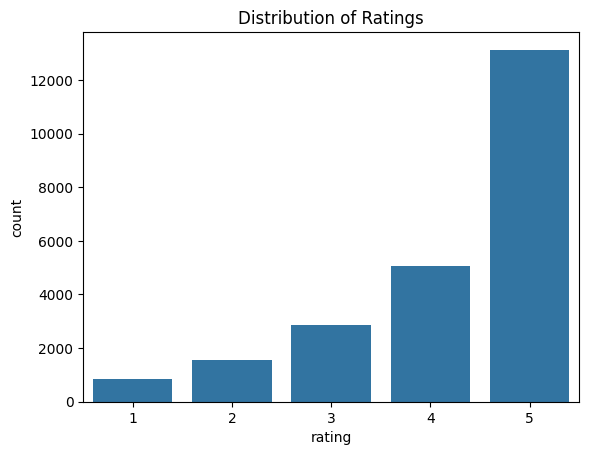

In [22]:
# Visualize the distribution of ratings
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()




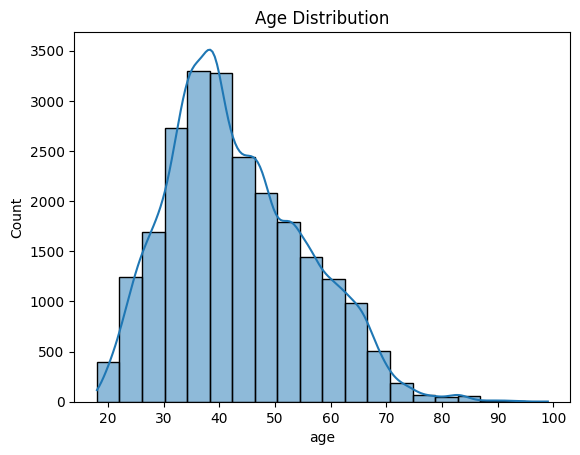

In [23]:
# Visualize the age distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()



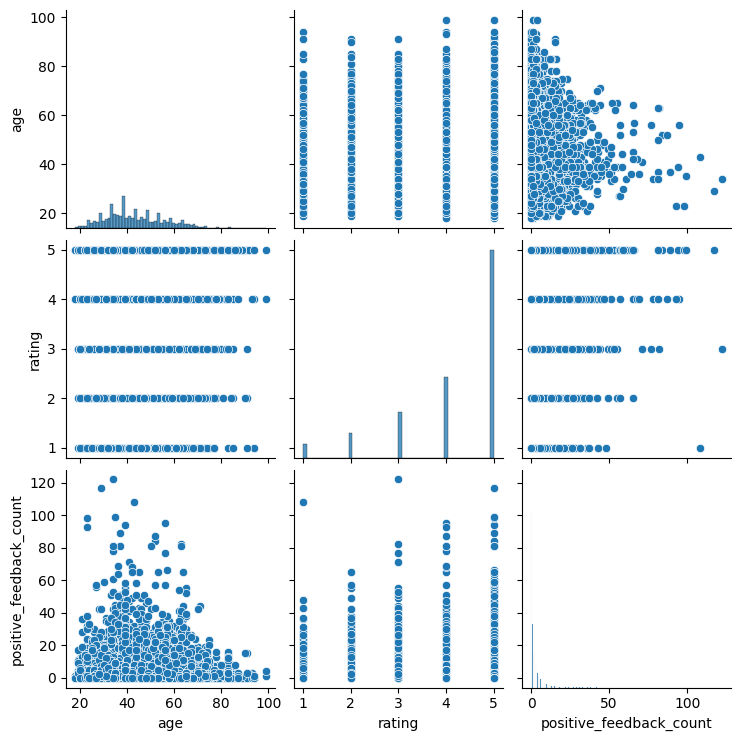

In [24]:
# Visualize relationships between numerical variables
sns.pairplot(df[['age', 'rating', 'positive_feedback_count']])
plt.show()



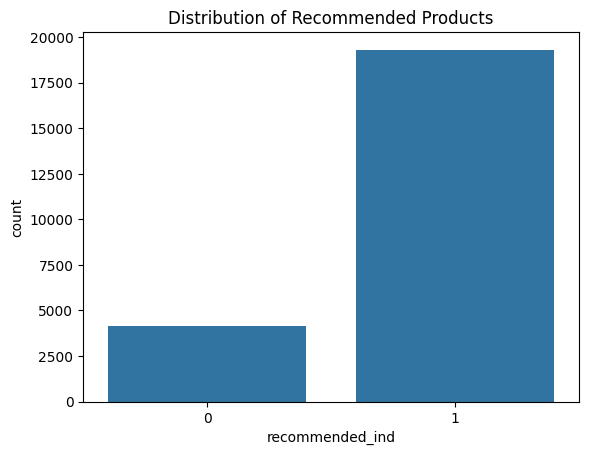

In [25]:
# Visualize the distribution of recommended and not recommended products
sns.countplot(x='recommended_ind', data=df)
plt.title('Distribution of Recommended Products')
plt.show()



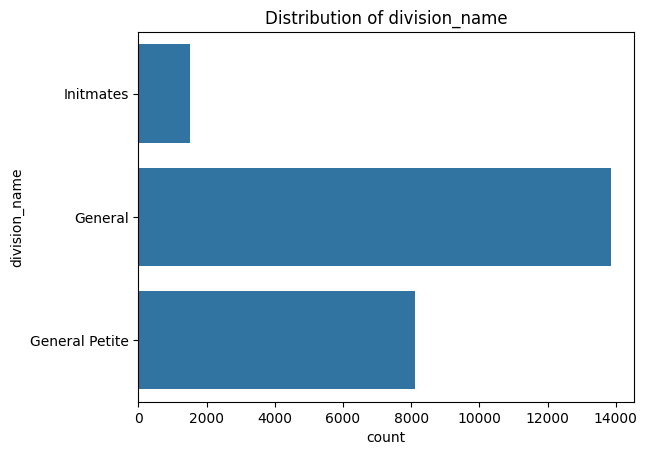

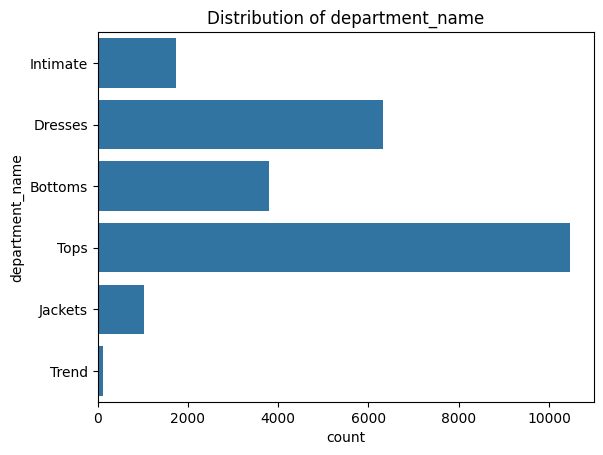

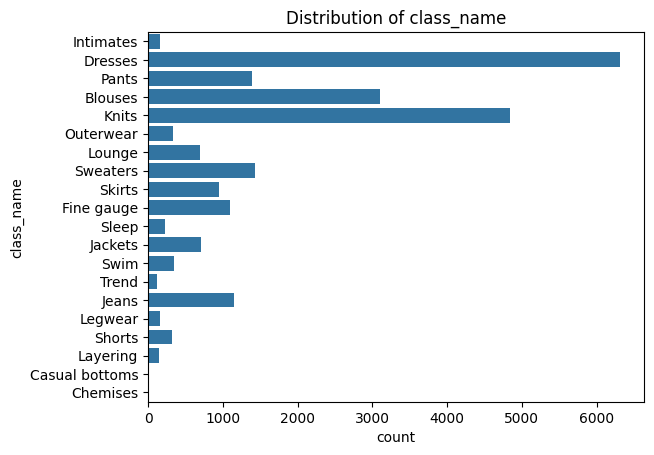

In [26]:
# Explore the distribution of categorical variables
categorical_vars = ['division_name', 'department_name', 'class_name']

for var in categorical_vars:
    sns.countplot(y=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.show()

Since I have some missing values in the columns such as "Title" and "Review Text", that appear to be crucial, I'd drop the rows with missing values in these columns. 
Also, I'll drop the duplicates.

In [27]:
df = df.dropna(subset=['title', 'review_text'])
df = df.drop_duplicates()

In order to not have to repeat all the data preparation, I'll save the obtained dataframe to a csv file 

In [28]:
df.to_csv('../data/cleaned_data.csv', index=False)